# Task 4: <font color="#338CFF">Email Spam Prediction</font>

---

## Contribution: <font color="#b30000">Rajesh Patil (Individual)</font>

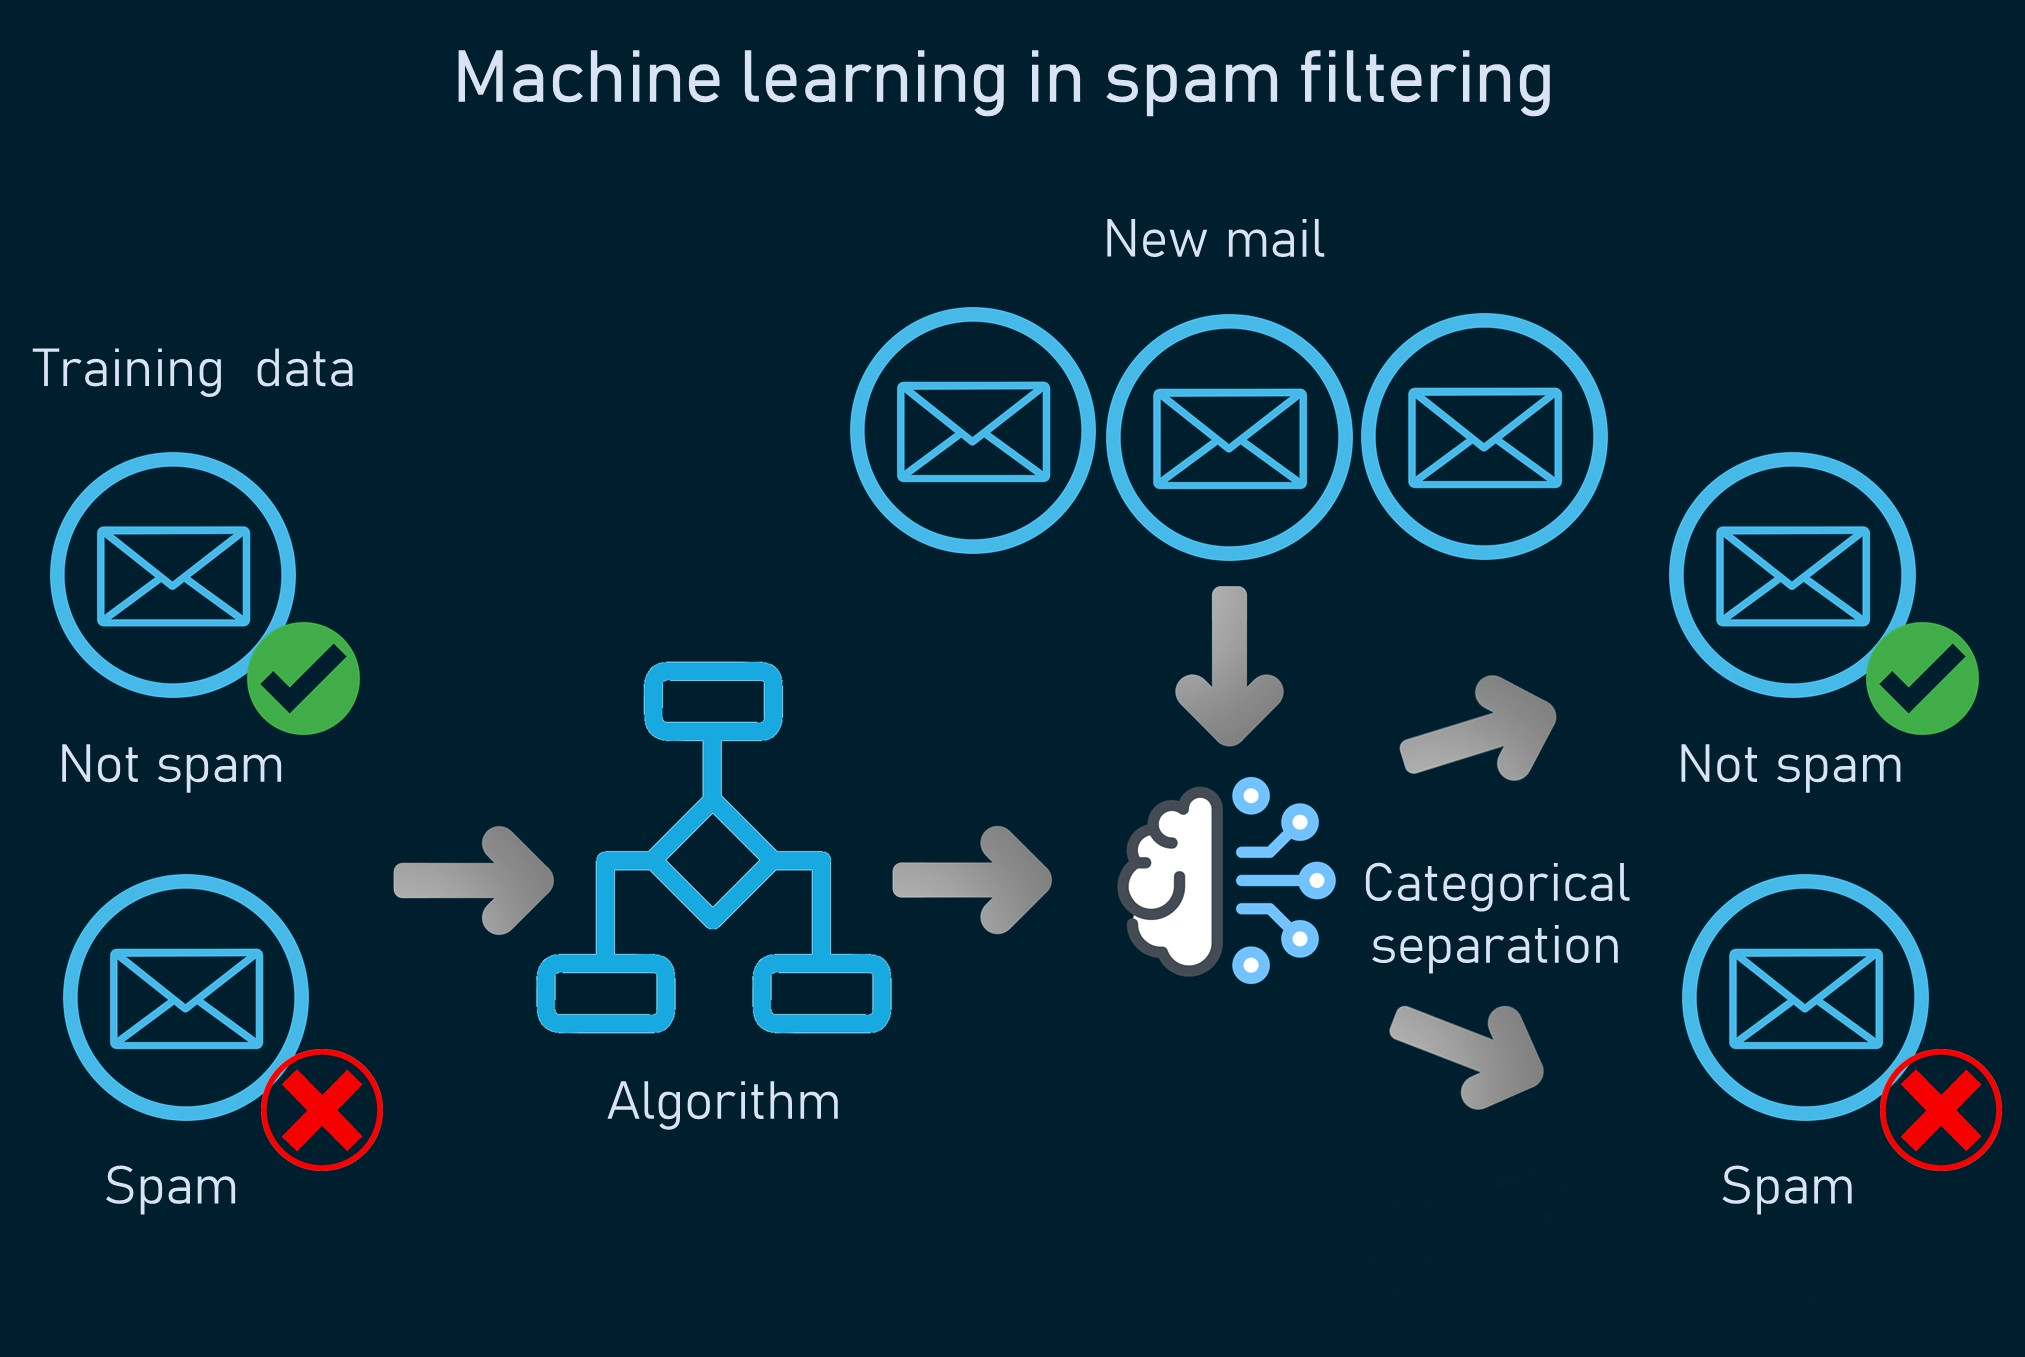

### <font color="#b30000">Step 1: Importing Libraries</font>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Loading Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Remove unwanted column from the dataset
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [7]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### Note: No NaN values in the dataset.

In [10]:
# Convert the NumPy array back to a pandas DataFrame
df = pd.DataFrame(df)

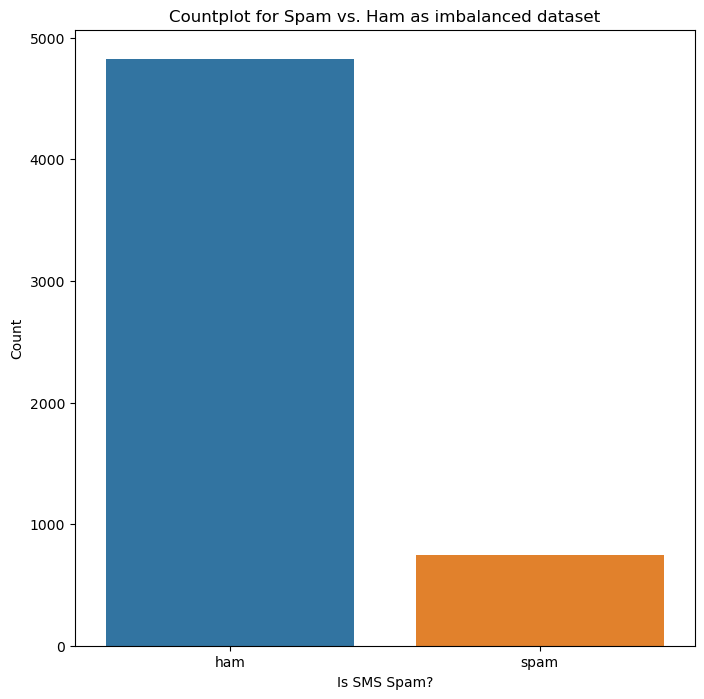

In [11]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

__Insight:__ From the above countplot, it is evident that the __dataset is imbalanced__.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'spam' column to encode the categories
df['label'] = label_encoder.fit_transform(df['label'])

In [13]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### <font color="#b30000">Step 2: Feature Engineering</font>
- Handling imbalanced dataset using Oversampling
- Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.

In [14]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('\033[1mNumber of Spam records:\033[0m {}'.format(only_spam.shape[0]))
print('\033[1mNumber of Ham records:\033[0m {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [15]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape

(9307, 2)

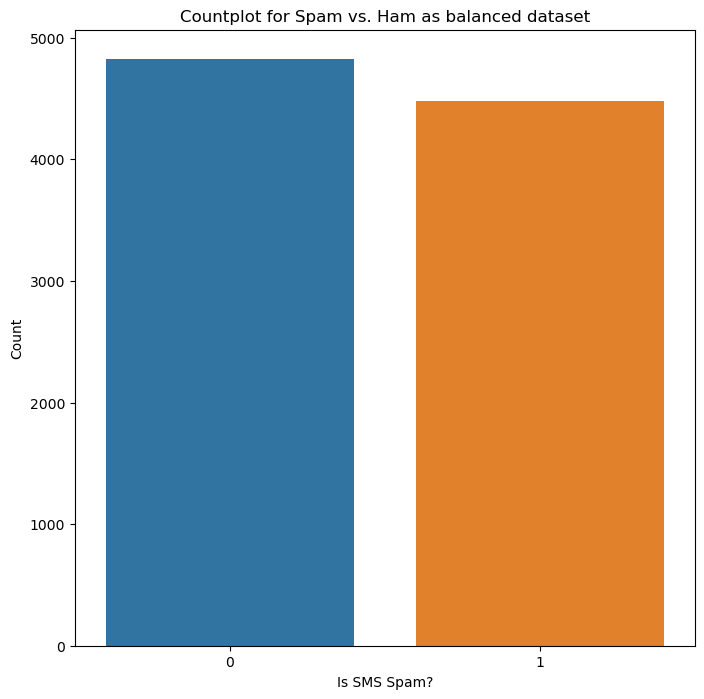

In [16]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [17]:
# Creating new feature word_count
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

In [18]:
df.head()

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


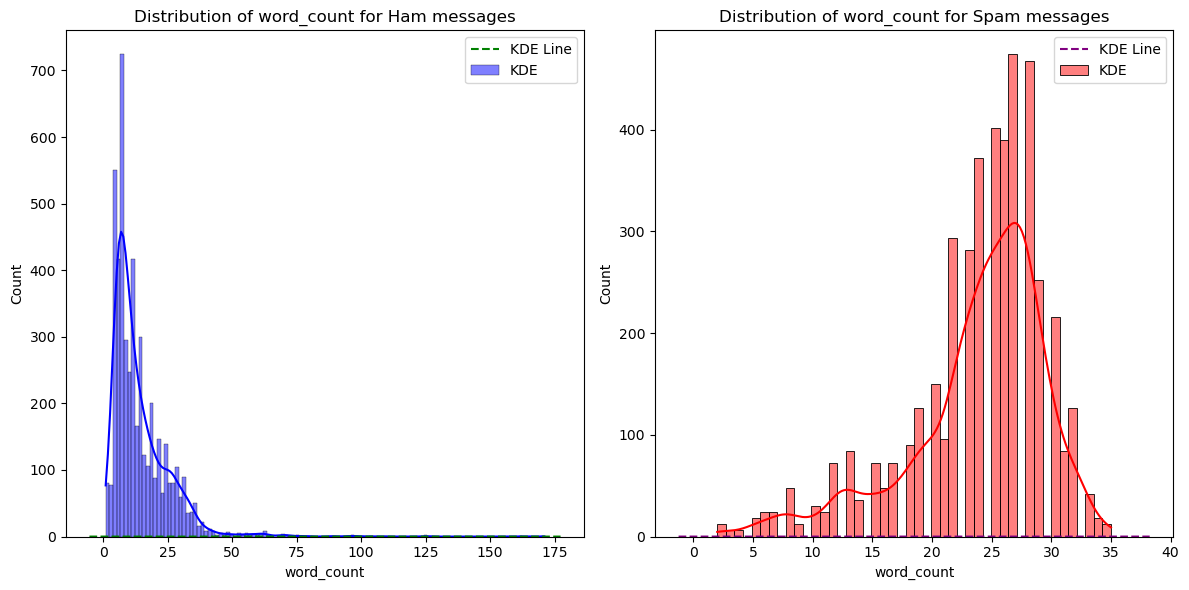

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['label'] == 0], x='word_count', kde=True, color='blue', label='KDE')
sns.kdeplot(data=df[df['label'] == 0]['word_count'], color='green', linestyle='dashed', label='KDE Line')
plt.title('Distribution of word_count for Ham messages')
plt.legend()

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
sns.histplot(data=df[df['label'] == 1], x='word_count', kde=True, color='red', label='KDE')
sns.kdeplot(data=df[df['label'] == 1]['word_count'], color='purple', linestyle='dashed', label='KDE Line')
plt.title('Distribution of word_count for Spam messages')
plt.legend()

plt.tight_layout()
plt.show()

__Insight: Spam messages__ word_count fall in the range of __15-30 words__, whereas majority of the __Ham messages__ fall in the range of __below 25 words__.

In [20]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['message'].apply(currency)

In [21]:
df.tail()

,label,message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


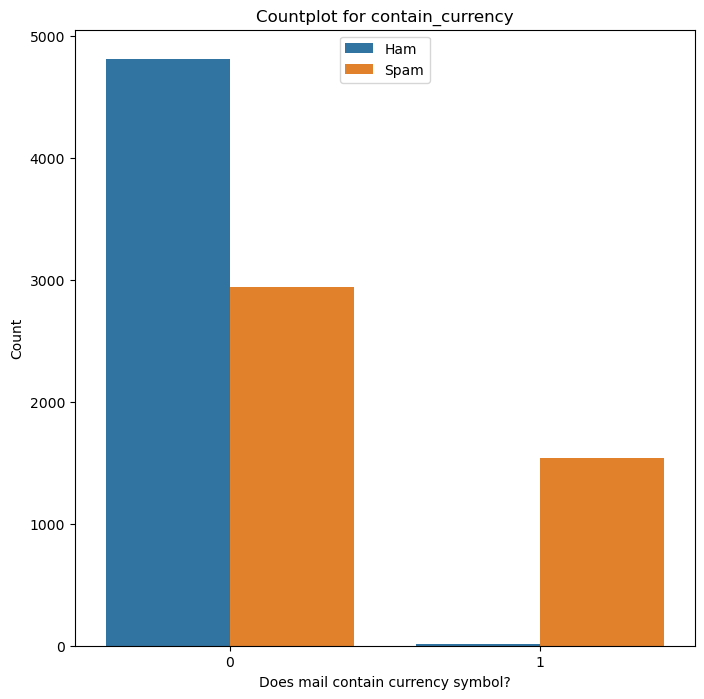

In [22]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does mail contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

__Insight: Almost 1/3 of Spam messages contain currency symbols__, and currency symbols are __rarely used in Ham messages__.

In [23]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['message'].apply(numbers)

In [24]:
df.head()

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


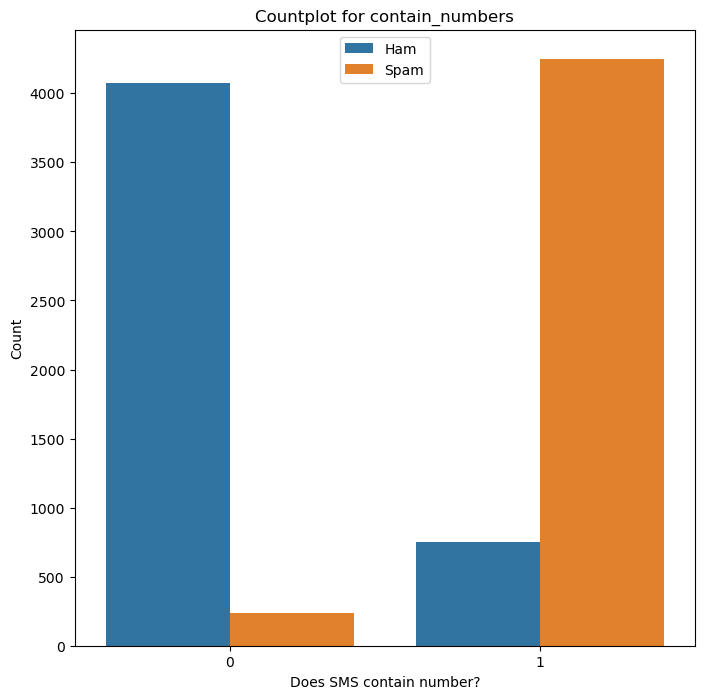

In [25]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

_**Insight:** It is evident that **most of the Spam messages contain numbers,** and **majority of the Ham messages donot contain numbers.**_

### <font color="#b30000">Step 3: Data Cleaning</font>
* Removing special character and numbers using regular expression
* Converting the entire sms into lower case
* Tokenizing the sms by words
* Removing the stop words
* Lemmatizing the words
* Joining the lemmatized words
* Building a corpus of messages

In [26]:
# Importing essential libraries for performing NLP
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\07pat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.message):

  # Cleaning special character from the sms
  message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  message = message.lower()

  # Tokenizing the sms by words
  words = message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(message)

In [28]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [29]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['label']

### <font color="#b30000">Step 4: Model Building & Evaluation</font>

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <font color="#338CFF">Multinomial Naive Bayes</font>

In [32]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('\033[1mAverage F1-Score for MNB model:\033[0m {} '.format(round(cv.mean(), 3)))
print('\033[1mStandard Deviation:\033[0m {}'.format(round(cv.std(), 3)))

Average F1-Score for MNB model: 0.944 
Standard Deviation: 0.004


In [33]:
# Classification report for MNB model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('\033[1mClassification report for MNB model:\033[0m')
print(classification_report(y_test, y_pred))

Classification report for MNB model:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       958
           1       0.94      0.94      0.94       904

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



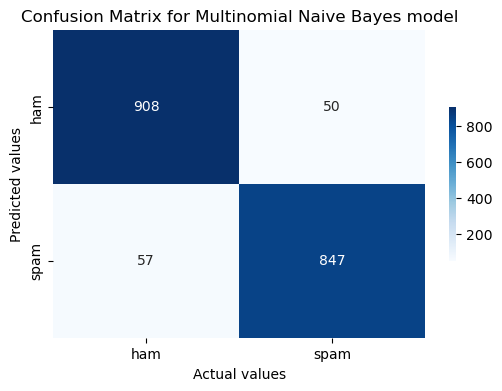

In [34]:
# Confusion matrix of MNB model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Multinomial Naive Bayes model')

### <font color="#338CFF">Decision Tree</font>

In [35]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv = cross_val_score(dt, X, y, scoring='f1', cv=10)
print('\033[1mAverage F1-Score for Decision Tree model:\033[0m {} '.format(round(cv.mean(), 3)))
print('\033[1mStandard Deviation:\033[0m {}'.format(round(cv.std(), 3)))

Average F1-Score for Decision Tree model: 0.98 
Standard Deviation: 0.004


In [36]:
# Classification report for Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('\033[1mClassification report for Decision Tree model\033[0m')
print(classification_report(y_test, y_pred))

Classification report for Decision Tree model
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       958
           1       0.96      1.00      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



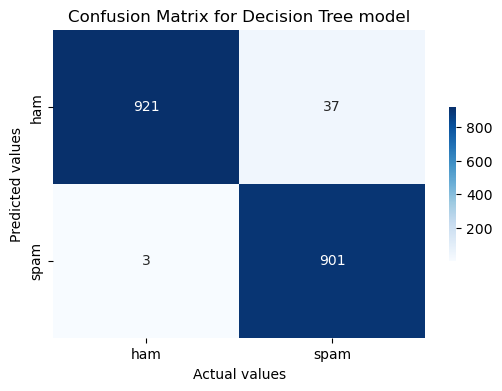

In [38]:
# Confusion matrix of Decision Tree model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Decision Tree model')

### <font color="#338CFF">Random Forest</font>

In [39]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
cv = cross_val_score(rf, X, y, scoring='f1', cv=10)
print('\033[1mAverage F1-Score for Random Forest model:\033[0m {} '.format(round(cv.mean(), 3)))
print('\033[1mStandard Deviation:\033[0m {}'.format(round(cv.std(), 3)))

Average F1-Score for Random Forest model: 0.996 
Standard Deviation: 0.002


In [40]:
# Classification report for Random Forest model
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('\033[1mClassification report for Random Forest model\033[0m')
print(classification_report(y_test, y_pred))

Classification report for Random Forest model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       958
           1       0.99      1.00      0.99       904

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



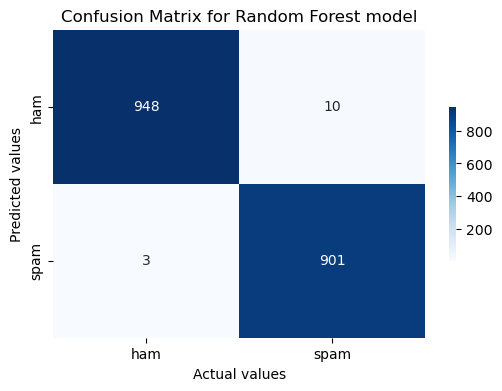

In [41]:
# Confusion matrix of Random Forest model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Random Forest model')

_**Note:** Decision Tree & MNB algorithms are selected and fed to Voting algorithm to increase the F1-Score!_

In [42]:
# Fitting Decision Tree and MNB to VotingClassifier
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('decision_tree', dt), ('m_naive_bayes', mnb)], weights=[2,1])
cv = cross_val_score(vc, X, y, cv=10, scoring='f1')

print('\033[1mAverage F1-Score for VotingClassifier model:\033[0m {} '.format(round(cv.mean(), 3)))
print('\033[1mStandard Deviation:\033[0m {}'.format(round(cv.std(), 3)))

Average F1-Score for VotingClassifier model: 0.979 
Standard Deviation: 0.005


_**Note:** Voting algorithm did not out-perform Random Forest algorithm, hence **Random Forest algorithm is selected for predicting the results of this problem statement.**_

### <font color="#b30000">Step 5: Making Predictions</font>

In [43]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return rf.predict(temp)

In [44]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('\033[1mGotcha! This is a SPAM mail.\033[0m')
else:
  print('\033[1mThis is a HAM (normal) mail.\033[0m')

Gotcha! This is a SPAM mail.


C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
  print('\033[1mGotcha! This is a SPAM mail.\033[0m')
else:
  print('\033[1mThis is a HAM (normal) mail.\033[0m')

This is a HAM (normal) mail.


C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [46]:
# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account ******0000 within 24-48 business hours. Thank you!'

if predict_spam(sample_message):
  print('\033[1mGotcha! This is a SPAM mail.\033[0m')
else:
  print('\033[1mThis is a HAM (normal) mail.\033[0m')

This is a HAM (normal) mail.


C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [47]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('\033[1mGotcha! This is a SPAM mail.\033[0m')
else:
  print('\033[1mThis is a HAM (normal) mail.\033[0m')

Gotcha! This is a SPAM mail.


C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## <font color="#338CFF">Thank You..</font>